Librerias


In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [2]:

import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


import warnings
warnings.filterwarnings("ignore")
sns.set()

Carga de los datos

In [3]:
# Cargamos los datos
#index_col=0
df = pd.read_csv('./BTCUSDT1h-18.8.17-31-7-22.csv',index_col=0, parse_dates=True)
df=df.drop(columns=['ignore'])
df=df.drop(columns=['open_time'])
df=df.drop(columns=['close_time'])

In [4]:
df.head()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 00:59:59.999,4285.08,4340.62,4228.76,4286.53,82.435474,353504.410409,268,70.703594,303212.284309
2017-08-18 01:59:59.999,4269.36,4269.36,4134.61,4243.59,75.684883,318327.529415,243,45.573568,192407.488931
2017-08-18 02:59:59.999,4251.95,4298.64,4234.00,4267.59,54.071337,230478.628087,219,46.316836,197398.076557
2017-08-18 03:59:59.999,4244.77,4308.70,4234.00,4292.39,64.001349,273495.006480,306,52.061572,222560.204200
2017-08-18 04:59:59.999,4292.39,4292.39,4234.43,4287.92,50.797515,216512.633035,267,45.826187,195365.989365


Variables, proceso y adaptación

In [5]:
#Variables
n_obs=math.floor(72)
freq='h'

#adaptación
df=df.asfreq(freq)
df=df.fillna(method='ffill')
df.isnull().sum()
#Check
nan_rows = df[df.isnull().any(1)]
nan_rows

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,


Función para imprimir resultados

In [6]:
warnings.simplefilter('ignore')

def show_graphp1(data,title):
    #data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    #data=data.iloc[43200:]

    for col in data.columns:
        if col.lower().startswith('yhat'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)

    plt.rcParams["figure.figsize"] = (20, 10)
    plt.title(title)
    plt.legend()
    plt.show()
    print ()
    print('Evaluated model:', title)
    print('Mean absolute error:', mean_absolute_error(data['y'].values,data['yhat'].values))
    print('Root mean squared error:', np.sqrt(mean_squared_error(data['y'].values,data['yhat'].values)))

In [22]:
warnings.simplefilter('ignore')

def show_graphp2(data,title):
    data.reset_index(inplace=True, drop=True)
    data=data.iloc[43200:]

    for col in data.columns:
        if col.lower().startswith('predicted_mean'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)

    plt.rcParams["figure.figsize"] = (20, 10)
    plt.title(title)
    plt.legend()
    plt.show()
   

Test/train

In [8]:
#train test todos los datos
df_train, df_test = df[0:-n_obs], df[-n_obs:]
#train test una variable
df1 = df.drop(['open', 'high','low', 'volume', 'qav','num_trades', 'taker_base_vol','taker_quote_vol'], axis=1)
df1_train, df1_test = df1[0:-n_obs], df1[-n_obs:]

# Prophet 1 variable con train y test modelo optimizado

In [9]:
#Importación delibrerias del modelo
from prophet import Prophet

#df_train, df_test
df1 = df.drop(['open', 'high','low', 'volume', 'qav','num_trades', 'taker_base_vol','taker_quote_vol'], axis=1)
df1_train, df1_test = df1[0:-n_obs], df1[-n_obs:]
df1_train = df1_train.reset_index()
df1_train.columns=['ds','y']

df1 = df1.reset_index()
df1.columns=['ds','y']
#dataset para obtener los resultados

df1_test = df1_test.reset_index()
df1_test.columns=['ds','y']
future=df1_test.drop(columns=['y'])


In [11]:
#Importación delibrerias del modelo
from prophet import Prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpoi82d_mn/435ler45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoi82d_mn/g91doqih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72220', 'data', 'file=/tmp/tmpoi82d_mn/435ler45.json', 'init=/tmp/tmpoi82d_mn/g91doqih.json', 'output', 'file=/tmp/tmpvirch8_2/prophet_model-20220920102321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:23:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:31:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


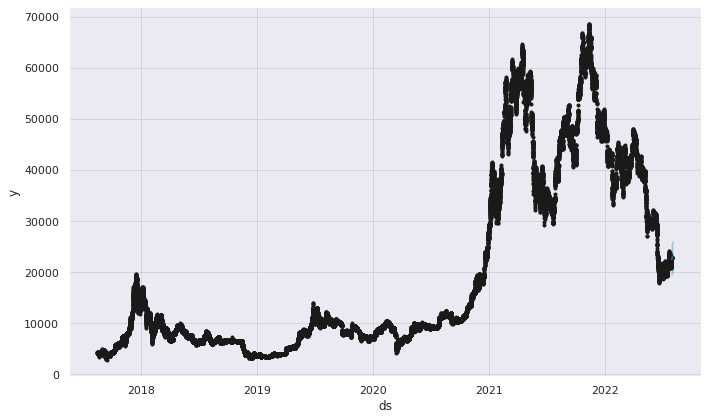

In [14]:
model = Prophet(changepoint_prior_scale= 0.5,
                      holidays_prior_scale = 0.2,
                      n_changepoints = 100,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                     interval_width=0.95)

model.fit(df1_train)

forecast = model.predict(future)
fig = model.plot(forecast)

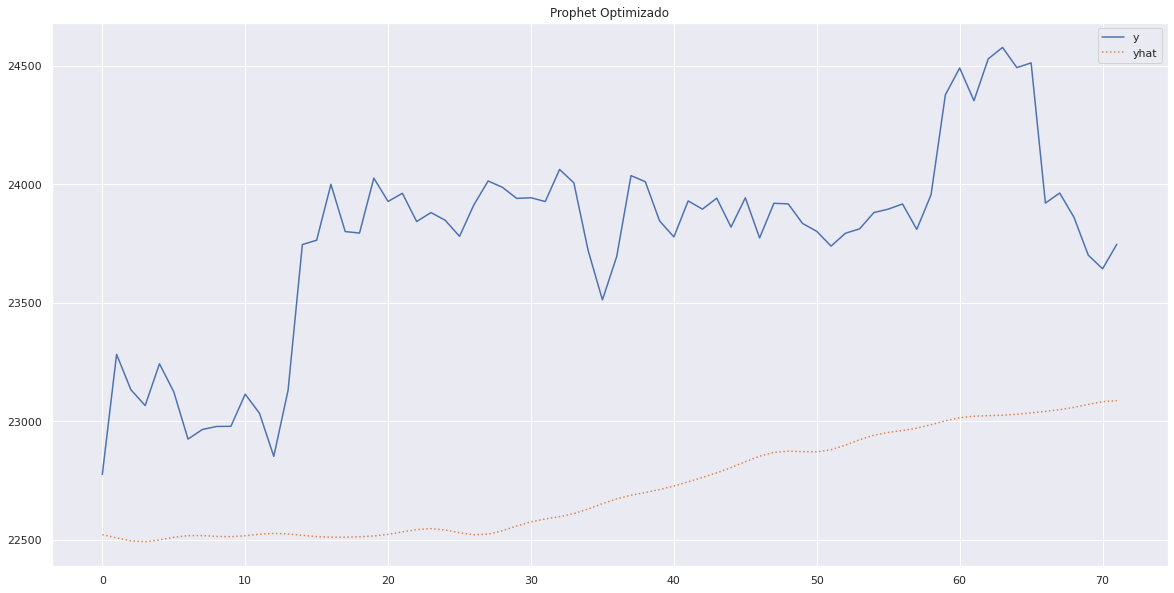


Evaluated model: Prophet Optimizado
Mean absolute error: 1041.5725306028414
Root mean squared error: 1096.989225840983



In [19]:
#Unir datasets para calcular las metricas
metric_df = forecast.set_index('ds')[['yhat']].join(df1_test.set_index('ds').y).reset_index()
metric_df = metric_df.reindex(columns=['ds','y','yhat'])
metric_df.dropna(inplace=True)
metric_df.set_index("ds",inplace = True)

show_graphp1(metric_df, 'Prophet Optimizado')
print()



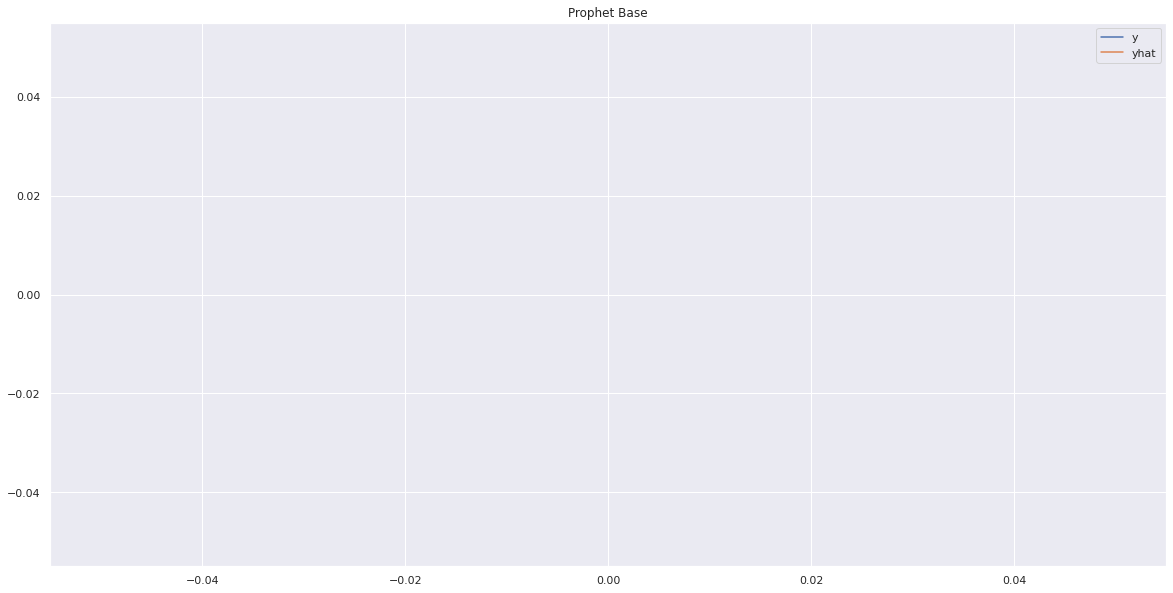

In [23]:
show_graphp2(metric_df, 'Prophet Base')
print()
